In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import minmax_scale


# generate a single sine wave for a specified time period
def sine_wave_generator(frequency = 5e5, duration = 5e-4, sample_rate = 6e6, amplitude = 1, start_time = 0, end_time = None):
    #Sanity check with timings    
    if duration <= start_time: print("Bad timing! Check start time.")
        
    
#    if start_time == 0:
        
#        x = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
#        frequencies = x * frequency
#        clean_signal = amplitude * np.sin((2 * np.pi) * frequencies)


    if end_time == None:
            end_time = duration
        
    # Filling the bins with zeros before signal starts
    x = np.linspace(0, start_time, int(sample_rate * start_time), endpoint=False)
    frequencies = x * frequency
    clean_signal = 0 * frequencies
      
    # Generating sine wave signal for the signal duration
    y = np.linspace(start_time, duration, int(sample_rate * (end_time-start_time)), endpoint=False)
    frequencies = y * frequency
    clean_signal = np.append(clean_signal, amplitude * np.sin((2 * np.pi) * frequencies))
        
    # Filling the bins with zeros after signal ends
    z = np.linspace(end_time, duration, int(sample_rate * (duration - end_time)), endpoint=False)
    frequencies = z * frequency
    clean_signal = np.append(clean_signal, 0 * frequencies)
          
        
    return clean_signal


# generate white noise 
def noise_generator(duration = 5e-4, amplitude = 1, sample_rate = 6e6, mu = 0, sigma = 0.5):
    #making sure signal and noise have the same dimension
    time_steps = int(sample_rate*duration)
    noise = amplitude * np.random.normal(mu, sigma, time_steps) 

    return noise



In [2]:
# generate a chirp and mix that with white noise

import random
from datetime import datetime
random.seed(datetime.now().timestamp())


first_harmonic_time_diff = random.uniform(1e4, 2e4)
second_harmonic_time_diff = random.uniform(3.2e4, 6e4)

first_harmonic_amp = random.uniform(0.3, 0.5)
second_harmonic_amp = random.uniform(0.3, 0.6)


def signal_generator(frequency = 5e5, duration = 5e-4, sample_rate = 6e6, start_time = 2e-4, end_time = 4.5e-4, signal_amplitude = 0.01, noise_amplitude = 1, mu = 0, sigma = 0.5):
    
    # creating gaussian white noise for the entire duration 
    noise = noise_generator(duration, noise_amplitude, sample_rate, mu, sigma) 

    #Generating desired chirping signal and making sure it has the same dimension as noise
    clean_signal1 = sine_wave_generator(frequency - second_harmonic_time_diff, duration, sample_rate, signal_amplitude * second_harmonic_amp, start_time, end_time)

    
    clean_signal2 = sine_wave_generator(frequency - first_harmonic_time_diff, duration, sample_rate, signal_amplitude * first_harmonic_amp, start_time, end_time)
    

    clean_signal3 = sine_wave_generator(frequency, duration, sample_rate, signal_amplitude, start_time, end_time)
    

    clean_signal4 = sine_wave_generator(frequency + first_harmonic_time_diff, duration, sample_rate, signal_amplitude * first_harmonic_amp, start_time, end_time)
    

    clean_signal5 = sine_wave_generator(frequency + second_harmonic_time_diff, duration, sample_rate, signal_amplitude * second_harmonic_amp, start_time, end_time)
    
    
    clean_signal = clean_signal1 + clean_signal2 + clean_signal3 + clean_signal4 + clean_signal5
    clean_signal = np.resize(clean_signal, noise.shape)    
    
    
    return clean_signal, (clean_signal + noise)



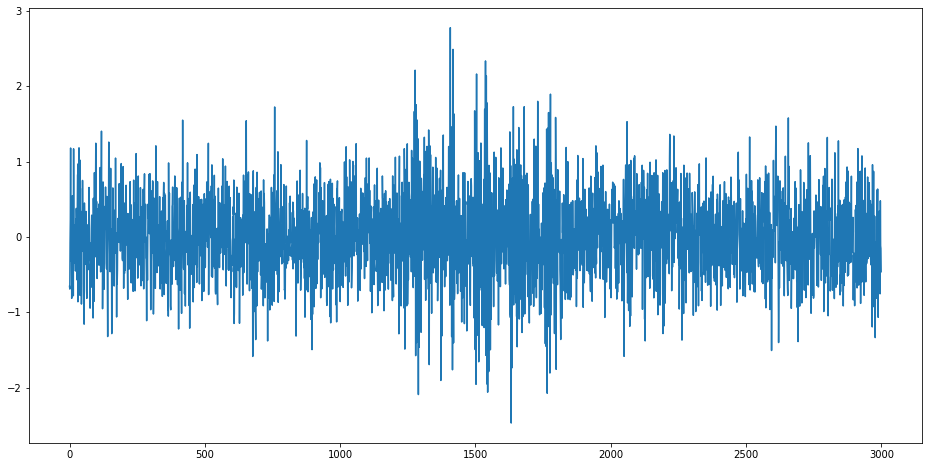

In [3]:

#noise = noise_generator()

_, signal1 = signal_generator(frequency = 4e5, start_time = 1e-4, end_time = 4e-4, signal_amplitude = 0.1)
_, signal2 = signal_generator(frequency = 6e5, start_time = 2e-4, end_time = 3e-4, signal_amplitude = 0.6)
_, signal3 = signal_generator(frequency = 8e5, start_time = 1e-4, signal_amplitude = 0.08)


# Troubleshooting
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(signal1)


signal = signal2
figure(figsize=(16, 8))
#plt.plot(noise, label="noise")
plt.plot(signal)
plt.show()


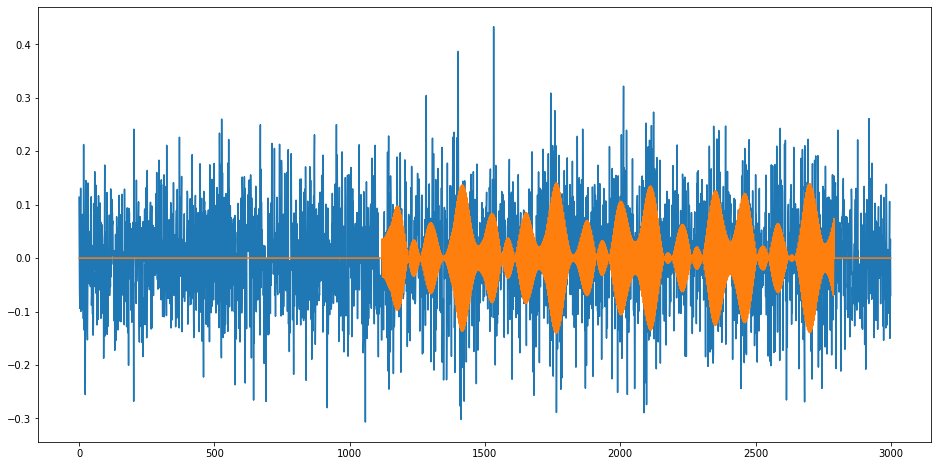

[0.10729268 0.21297692 0.04826608 ... 0.11169274 0.05443833 0.12298373]


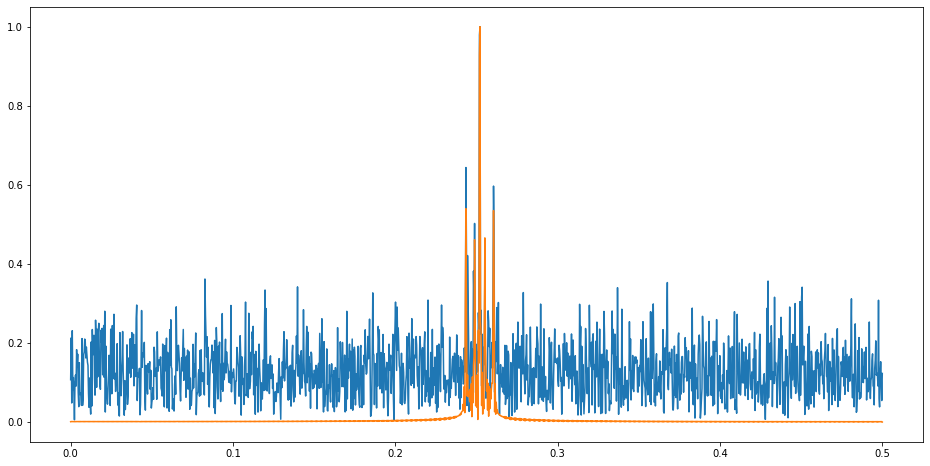

In [4]:
#generating a random noisy signal


frequency = random.uniform(5e5, 5e7)
start_time = random.uniform(0, 2.5e-4)
end_time = random.uniform(2.6e-4, 5e-4)
signal_amplitude = random.uniform(0.02, 0.06)
noise_amplitude = random.uniform(0.7, 1)
mu = random.uniform(-0.05, 0.05)
sigma = random.uniform(0.1, 0.2)


signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

plt.figure(figsize=(16,8))
plt.plot(noisy_signal)
plt.plot(signal, label = "signal")
plt.show()



# Plotting normalized Fourier transform of the above signal

import scipy
from scipy.fft import rfft, rfftfreq
#import pyfftw as fftw

# Number of samples in signal
N = 3000

yf = rfft(noisy_signal)[1:]/np.amax(np.abs(rfft(noisy_signal)[1:]))
xf = rfftfreq(N-2, 1)

ys = rfft(signal)[1:]/np.amax(np.abs(rfft(signal)[1:]))
xs = rfftfreq(N-2, 1)

print(np.abs(yf))
# yt = np.array(0.1)
# fftw.FFTW(signal, yt, axis = None)

plt.figure(figsize=(16,8))
plt.plot(xf, np.abs(yf))
plt.plot(xs, np.abs(ys))
#plt.plot(yt)
plt.show()



In [ ]:
import pandas as pd

no_of_noisy_signal_windows = 50000
no_of_noise_windows = 50000

noisy_signal_array = [] #np.ndarray(shape=(no_of_noisy_signal_windows,1))
signal_array = [] #np.ndarray(shape=(no_of_noisy_signal_windows,1))


# produces signal with noise background, outputs the burried signal too
for i in range(0, no_of_noisy_signal_windows):
    
    frequency = random.uniform(5e5, 5e7)
    start_time = random.uniform(0, 2.5e-4)
    end_time = random.uniform(2.6e-4, 5e-4)
    signal_amplitude = random.uniform(0.02, 0.06)
    noise_amplitude = random.uniform(0.8, 1.1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)


    signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noisy_signal))[1:]/np.amax(np.abs(rfft(noisy_signal))[1:]))
    noisy_signal_array = np.append(noisy_signal_array, 1)
#    signal_array = np.append(signal_array, signal)

# print(noisy_signal_array)
# produces windows of data with only white noise

for j in range(0, no_of_noise_windows):

    amplitude = random.uniform(0.8, 1.1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)
    
    noise = noise_generator(amplitude = amplitude, mu = mu, sigma = sigma)
    
    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noise))[1:]/np.amax(np.abs(rfft(noise))[1:]))
    noisy_signal_array = np.append(noisy_signal_array, 0)
#    signal_array = np.append(signal_array, noise*0)

# Arranging all data points in rows, last column represents the presence (1) or absence (0) of a signal
noisy_signal_array = np.reshape(noisy_signal_array, ((no_of_noisy_signal_windows + no_of_noise_windows),1501))
# import sys
# np.set_printoptions(threshold=sys.maxsize)
#print(noisy_signal_array)    

df = pd.DataFrame(noisy_signal_array)

#print(df)

df.to_csv("timeseries_row_test_new.csv", header = None, index = None)
    

In [24]:
#!pip install --upgrade pip
#!pip install scikeras
!pip3 show sklearn
#import scikit-learn
#!pip install tensorflow==2.11.*

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/easybuild_allnodes/software/Python/3.9.5-GCCcore-10.3.0/bin/python3.9 -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, MaxPooling2D, Conv2D, Dropout, Flatten, Reshape, BatchNormalization
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
# load dataset
dataframe = pd.read_csv("timeseries_row_test_new.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:1500].astype(float)
Y = dataset[:,1500]

print(Y)

[1. 1. 1. ... 0. 0. 0.]


In [ ]:
# encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
#print(encoded_Y)

Epoch 1/100
75/75 [==============================] - 5s 35ms/step - loss: 0.5730 - accuracy: 0.7057 - val_loss: 0.7008 - val_accuracy: 0.2270
Epoch 2/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4932 - accuracy: 0.7521 - val_loss: 0.7152 - val_accuracy: 0.1785
Epoch 3/100
75/75 [==============================] - 2s 22ms/step - loss: 0.4609 - accuracy: 0.7614 - val_loss: 0.7414 - val_accuracy: 0.1826
Epoch 4/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4436 - accuracy: 0.7635 - val_loss: 0.7545 - val_accuracy: 0.2913
Epoch 5/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4319 - accuracy: 0.7679 - val_loss: 0.7465 - val_accuracy: 0.4496
Epoch 6/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4248 - accuracy: 0.7681 - val_loss: 0.7176 - val_accuracy: 0.5900
Epoch 7/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4192 - accuracy: 0.7708 - val_loss: 0.6664 - val_accuracy: 0.7104
Epoch 

75/75 [==============================] - 2s 23ms/step - loss: 0.4014 - accuracy: 0.7775 - val_loss: 0.5744 - val_accuracy: 0.8346
Epoch 59/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4002 - accuracy: 0.7784 - val_loss: 0.5933 - val_accuracy: 0.8148
Epoch 60/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4008 - accuracy: 0.7781 - val_loss: 0.5948 - val_accuracy: 0.8143
Epoch 61/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4004 - accuracy: 0.7788 - val_loss: 0.5898 - val_accuracy: 0.8188
Epoch 62/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4004 - accuracy: 0.7785 - val_loss: 0.5759 - val_accuracy: 0.8323
Epoch 63/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4005 - accuracy: 0.7791 - val_loss: 0.5709 - val_accuracy: 0.8353
Epoch 64/100
75/75 [==============================] - 2s 23ms/step - loss: 0.4003 - accuracy: 0.7791 - val_loss: 0.5769 - val_accuracy: 0.8302
Epoch 65/100

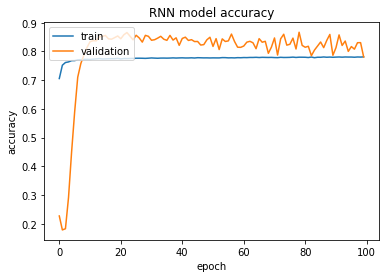

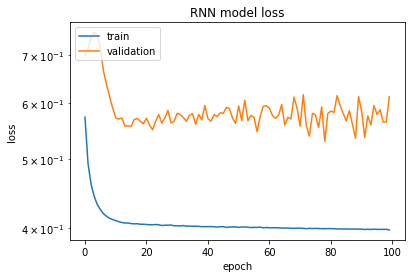

In [8]:
from tensorflow.keras.layers import LSTM

model2 = Sequential()

model2.add(Reshape((100,15), input_shape = (1500,)))

model2.add(LSTM(32, activation='tanh', return_sequences=True))
#model2.add(Dropout(0))

model2.add(BatchNormalization())

model2.add(LSTM(40, activation='tanh'))
model2.add(Dropout(0.2))

model2.add(Dense(32, activation='relu'))

model2.add(Flatten())

model2.add(Dense(1, activation='sigmoid'))
#model2.add(Dropout(0.1))

#optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.01)

# Compile model 
model2.compile(loss='binary_crossentropy', optimizer= "SGD", metrics=['accuracy'])

plot_progress2 = model2.fit(X, Y, validation_split=0.25, epochs=100, batch_size=1000, shuffle=True, verbose=1 )
#model2.save('/content/model/RNN')

# history for accuracy
plt.plot(plot_progress2.history['accuracy'])
plt.plot(plot_progress2.history['val_accuracy'])
plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(plot_progress2.history['loss'])
plt.plot(plot_progress2.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.yscale('log')
plt.show()

In [10]:

####################### FOR TESTING TRAINED NETWORK ############################


noisy_signal_array = []
for i in range(0, 10):
    
    frequency = random.uniform(5e5, 5e7)
    start_time = random.uniform(0, 2.5e-4)
    end_time = random.uniform(2.6e-4, 5e-4)
    signal_amplitude = random.uniform(0.02, 0.1)
    noise_amplitude = random.uniform(0.9, 1.1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)


    signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noisy_signal))[1:]/np.amax(np.abs(rfft(noisy_signal))[1:]))
   # noisy_signal_array = np.append(noisy_signal_array)

#resetting noisy signal array to feed noise data only
#noisy_signal_array = []

for j in range(0, 10):

    amplitude = random.uniform(0.9, 1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)
    
    noise = noise_generator(amplitude = amplitude, mu = mu, sigma = sigma)
    
    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noise))[1:]/np.amax(np.abs(rfft(noise))[1:]))
#    noisy_signal_array = np.append(noisy_signal_array, 0)


test_signal_array = np.reshape(noisy_signal_array, (20,1500))

test_df = pd.DataFrame(test_signal_array)

#print(test_df)

# converting to np_array for efficient feeding
test_df = test_df.values

In [11]:
#import keras
#model = keras.models.load_model('/content/model/')
X_test = test_df[:,0:1500].astype(float)
print(len(X_test[2]))

model2.predict([X_test])

1500


array([[0.3467776 ],
       [0.98593664],
       [0.3892267 ],
       [0.99843794],
       [0.998899  ],
       [0.99957377],
       [0.9995865 ],
       [0.33070427],
       [0.99946254],
       [0.99951124],
       [0.30947474],
       [0.3864804 ],
       [0.4627794 ],
       [0.45492572],
       [0.30102655],
       [0.5100913 ],
       [0.5591218 ],
       [0.29913434],
       [0.39625406],
       [0.32819802]], dtype=float32)

In [257]:
model2.save('ML/model/')

INFO:tensorflow:Assets written to: ML/model/assets
